In [ ]:
### Keras and Tensorflow>2.0

In [9]:
### Data collection
!pip install pandas-datareader
import pandas_datareader as pdr

In [11]:
pip install pandas-datareader --upgrade

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas_datareader as pdr
from tiingo import set_api_key

# Replace 'YOUR_API_KEY' with your actual API key
set_api_key('YOUR_API_KEY')

df = pdr.get_data_tiingo('AAPL')


ModuleNotFoundError: No module named 'tiingo'

In [15]:
!pip install tiingo

In [20]:
import pandas_datareader as pdr

# Replace 'YOUR_API_KEY' with your actual Tiingo API key
df = pdr.get_data_tiingo('AAPL', api_key='f494937b0790ce895630aeb51a0739a5bd926f10')



C:\Users\PC\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [21]:
df.to_csv('AAPL.csv')

In [22]:
import pandas as pd

In [24]:
df=pd.read_csv('AAPL.csv')

In [26]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-10-15 00:00:00+00:00,217.36,221.83,217.27,221.16,30791007,52.039428,53.109617,52.017881,52.949208,123164028,0.0,1.0
1,AAPL,2018-10-16 00:00:00+00:00,222.15,222.99,216.76,218.93,29183963,53.186230,53.387339,51.895778,52.415311,116735852,0.0,1.0
2,AAPL,2018-10-17 00:00:00+00:00,221.19,222.64,219.34,222.30,22885397,52.956391,53.303544,52.513471,53.222142,91541588,0.0,1.0
3,AAPL,2018-10-18 00:00:00+00:00,216.02,219.74,213.00,217.86,32581315,51.718611,52.609238,50.995575,52.159136,130325260,0.0,1.0
4,AAPL,2018-10-19 00:00:00+00:00,219.31,221.26,217.43,218.06,33078726,52.506289,52.973150,52.056187,52.207019,132314904,0.0,1.0


In [30]:
df1=df.reset_index()['close']

In [31]:
df1.shape

(1258,)

In [32]:
df1

0       217.36
1       222.15
2       221.19
3       216.02
4       219.31
         ...  
1253    178.99
1254    178.39
1255    179.80
1256    180.71
1257    178.85
Name: close, Length: 1258, dtype: float64

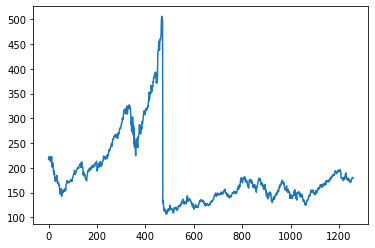

In [35]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data.so we apply MinMax scaler

In [36]:
import numpy as np

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

C:\Users\PC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [38]:
df1.shape


(1258, 1)

In [40]:
df1

array([[0.27681904],
       [0.28881653],
       [0.28641202],
       ...,
       [0.18274264],
       [0.18502192],
       [0.18036318]])

In [41]:
print(df1)

[[0.27681904]
 [0.28881653]
 [0.28641202]
 ...
 [0.18274264]
 [0.18502192]
 [0.18036318]]


In [45]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [46]:
training_size,test_size

(817, 441)

In [48]:
len(train_data),len(test_data)

(817, 441)

In [49]:
train_data

array([[2.76819036e-01],
       [2.88816531e-01],
       [2.86412023e-01],
       [2.73462743e-01],
       [2.81703193e-01],
       [2.85059487e-01],
       [2.90269255e-01],
       [2.71133375e-01],
       [2.82930495e-01],
       [2.74164058e-01],
       [2.63994991e-01],
       [2.66649969e-01],
       [2.80576080e-01],
       [2.88991860e-01],
       [2.52072636e-01],
       [2.37319975e-01],
       [2.42780213e-01],
       [2.58259236e-01],
       [2.54602379e-01],
       [2.44533500e-01],
       [2.18735128e-01],
       [2.13876018e-01],
       [2.00275517e-01],
       [2.11822167e-01],
       [2.17132123e-01],
       [1.97921102e-01],
       [1.75679399e-01],
       [1.75178460e-01],
       [1.63932373e-01],
       [1.69768316e-01],
       [1.68816531e-01],
       [1.85597996e-01],
       [1.82116468e-01],
       [1.79686913e-01],
       [1.95316218e-01],
       [1.74953037e-01],
       [1.70018785e-01],
       [1.54414527e-01],
       [1.57194740e-01],
       [1.54765185e-01],


In [50]:
test_data

array([[0.17204759],
       [0.1636819 ],
       [0.16588604],
       [0.15769568],
       [0.14875391],
       [0.14444584],
       [0.13918597],
       [0.13720726],
       [0.13259862],
       [0.1323732 ],
       [0.13119599],
       [0.15902317],
       [0.17016907],
       [0.16974327],
       [0.17282405],
       [0.16546024],
       [0.16418284],
       [0.16235441],
       [0.1702943 ],
       [0.17392611],
       [0.16350657],
       [0.15479023],
       [0.15539136],
       [0.16518472],
       [0.16458359],
       [0.15539136],
       [0.15143394],
       [0.14396994],
       [0.13332498],
       [0.14001252],
       [0.14529743],
       [0.1459737 ],
       [0.14116468],
       [0.14958046],
       [0.14875391],
       [0.14108954],
       [0.13139637],
       [0.12673763],
       [0.14053851],
       [0.12944271],
       [0.11994991],
       [0.1096556 ],
       [0.1208516 ],
       [0.13212273],
       [0.13470257],
       [0.14311835],
       [0.14662492],
       [0.155

In [69]:
import numpy 
#convert an array of values into a dataset matrix
def create_dataset(dataset,timestep=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] ###i =0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [70]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,ytest= create_dataset(test_data,time_step)

In [56]:
print(X_train)

[[0.27681904 0.28881653 0.28641202 ... 0.16445836 0.16548528 0.18048842]
 [0.28881653 0.28641202 0.27346274 ... 0.16548528 0.18048842 0.18552286]
 [0.28641202 0.27346274 0.28170319 ... 0.18048842 0.18552286 0.18752661]
 ...
 [0.11090795 0.10857858 0.0989856  ... 0.18827802 0.18249217 0.17051972]
 [0.10857858 0.0989856  0.09983719 ... 0.18249217 0.17051972 0.16320601]
 [0.0989856  0.09983719 0.10356919 ... 0.17051972 0.16320601 0.16363181]]


In [60]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [61]:
print(X_test.shape),print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [71]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [72]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [73]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 320ms/step - loss: 0.0578 - val_loss: 0.0067
Epoch 2/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0194 - val_loss: 0.0020
Epoch 3/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0128 - val_loss: 3.7144e-04
Epoch 4/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0106 - val_loss: 4.5474e-04
Epoch 5/100
12/12 [==============================] - 3s 214ms/step - loss: 0.0090 - val_loss: 2.9412e-04
Epoch 6/100
12/12 [==============================] - 3s 227ms/step - loss: 0.0079 - val_loss: 8.6871e-04
Epoch 7/100
12/12 [==============================] - 3s 243ms/step - loss: 0.0072 - val_loss: 3.7042e-04
Epoch 8/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0066 - val_loss: 2.7293e-04
Epoch 9/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0062 - val_loss: 3.0251e-04
Epoch 10/100
12/12 [==============================] - 3s 215ms/

12/12 [==============================] - 2s 194ms/step - loss: 0.0016 - val_loss: 1.9688e-04
Epoch 79/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0014 - val_loss: 2.2572e-04
Epoch 80/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0014 - val_loss: 1.8746e-04
Epoch 81/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0013 - val_loss: 1.8521e-04
Epoch 82/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0013 - val_loss: 1.8916e-04
Epoch 83/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0011 - val_loss: 1.8823e-04
Epoch 84/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0012 - val_loss: 2.6449e-04
Epoch 85/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0042 - val_loss: 5.7220e-04
Epoch 86/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0067 - val_loss: 5.0950e-04
Epoch 87/100
12/12 [==============================] - 2s 19

In [74]:
import tensorflow as tf

In [75]:
tf.__version__

'2.13.0'

In [76]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 36ms/step


In [77]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [78]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

105.78909175726051

In [79]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

106.22914353153693

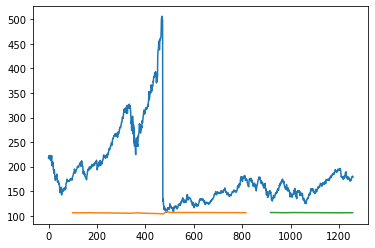

In [80]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [81]:
len(test_data)

441

In [82]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [83]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [84]:
temp_input

[0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 0.18564809016906697,
 0.19273638071383836,
 0.1915341264871634,
 0.19313713212273004,
 0.19829680651221032,
 0.1955666875391358,
 0.1957921102066374,
 0.1931621790857858,
 0.2007764558547276,
 0.19997495303694424,
 0.19644333124608637,
 0.2034314339386349,
 0.2064120225422667,
 0.2072636192861615,
 0.21823418910457104,
 0.21445209768315587,
 0.21162179085785848,
 0.21282404508453345,
 0.20999373825923606,
 0.20480901690670006,
 0.20348152786474638,
 0.20771446462116466,
 0.20964308077645577,
 0.21001878522229173,
 0.21828428303068248,
 0.2176330619912335,
 0.22106449592986843,
 0.21613024420788973,
 0.21314965560425791,
 0.215178459611772,
 0.21735754539762048,
 0.21956167814652466,
 0.21635566687539132,
 0.22289292423293672,
 0.224

In [85]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[-0.0015009]
101
1 day input [ 0.16280526  0.16568566  0.17179712  0.1764809   0.17635567  0.183469
  0.18562304  0.18219161  0.18126487  0.17778334  0.18467126  0.18564809
  0.19273638  0.19153413  0.19313713  0.19829681  0.19556669  0.19579211
  0.19316218  0.20077646  0.19997495  0.19644333  0.20343143  0.20641202
  0.20726362  0.21823419  0.2144521   0.21162179  0.21282405  0.20999374
  0.20480902  0.20348153  0.20771446  0.20964308  0.21001879  0.21828428
  0.21763306  0.2210645   0.21613024  0.21314966  0.21517846  0.21735755
  0.21956168  0.21635567  0.22289292  0.22444584  0.22232937  0.21475266
  0.21122104  0.18822793  0.18036318  0.18274264  0.17871008  0.17815905
  0.1777082   0.18189105  0.17685661  0.17465247  0.1682154   0.16944271
  0.17282405  0.17630557  0.18604884  0.17417658  0.17976205  0.18371947
  0.19356293  0.20240451  0.20295554  0.20693801  0.20753914  0.19053225
  0.17713212  0.17868503  0.18164058  0.17397621  0.16874139  0.17257358
  0.17074515  0.17815905

8 day output [[-0.00012907]]
9 day input [ 1.81264872e-01  1.77783344e-01  1.84671259e-01  1.85648090e-01
  1.92736381e-01  1.91534126e-01  1.93137132e-01  1.98296807e-01
  1.95566688e-01  1.95792110e-01  1.93162179e-01  2.00776456e-01
  1.99974953e-01  1.96443331e-01  2.03431434e-01  2.06412023e-01
  2.07263619e-01  2.18234189e-01  2.14452098e-01  2.11621791e-01
  2.12824045e-01  2.09993738e-01  2.04809017e-01  2.03481528e-01
  2.07714465e-01  2.09643081e-01  2.10018785e-01  2.18284283e-01
  2.17633062e-01  2.21064496e-01  2.16130244e-01  2.13149656e-01
  2.15178460e-01  2.17357545e-01  2.19561678e-01  2.16355667e-01
  2.22892924e-01  2.24445836e-01  2.22329368e-01  2.14752661e-01
  2.11221039e-01  1.88227927e-01  1.80363181e-01  1.82742642e-01
  1.78710081e-01  1.78159048e-01  1.77708203e-01  1.81891046e-01
  1.76856606e-01  1.74652473e-01  1.68215404e-01  1.69442705e-01
  1.72824045e-01  1.76305573e-01  1.86048842e-01  1.74176581e-01
  1.79762054e-01  1.83719474e-01  1.93562930e-01 

14 day output [[0.00060809]]
15 day input [ 1.93137132e-01  1.98296807e-01  1.95566688e-01  1.95792110e-01
  1.93162179e-01  2.00776456e-01  1.99974953e-01  1.96443331e-01
  2.03431434e-01  2.06412023e-01  2.07263619e-01  2.18234189e-01
  2.14452098e-01  2.11621791e-01  2.12824045e-01  2.09993738e-01
  2.04809017e-01  2.03481528e-01  2.07714465e-01  2.09643081e-01
  2.10018785e-01  2.18284283e-01  2.17633062e-01  2.21064496e-01
  2.16130244e-01  2.13149656e-01  2.15178460e-01  2.17357545e-01
  2.19561678e-01  2.16355667e-01  2.22892924e-01  2.24445836e-01
  2.22329368e-01  2.14752661e-01  2.11221039e-01  1.88227927e-01
  1.80363181e-01  1.82742642e-01  1.78710081e-01  1.78159048e-01
  1.77708203e-01  1.81891046e-01  1.76856606e-01  1.74652473e-01
  1.68215404e-01  1.69442705e-01  1.72824045e-01  1.76305573e-01
  1.86048842e-01  1.74176581e-01  1.79762054e-01  1.83719474e-01
  1.93562930e-01  2.02404508e-01  2.02955542e-01  2.06938009e-01
  2.07539136e-01  1.90532248e-01  1.77132123e-01

21 day output [[0.00026786]]
22 day input [ 1.96443331e-01  2.03431434e-01  2.06412023e-01  2.07263619e-01
  2.18234189e-01  2.14452098e-01  2.11621791e-01  2.12824045e-01
  2.09993738e-01  2.04809017e-01  2.03481528e-01  2.07714465e-01
  2.09643081e-01  2.10018785e-01  2.18284283e-01  2.17633062e-01
  2.21064496e-01  2.16130244e-01  2.13149656e-01  2.15178460e-01
  2.17357545e-01  2.19561678e-01  2.16355667e-01  2.22892924e-01
  2.24445836e-01  2.22329368e-01  2.14752661e-01  2.11221039e-01
  1.88227927e-01  1.80363181e-01  1.82742642e-01  1.78710081e-01
  1.78159048e-01  1.77708203e-01  1.81891046e-01  1.76856606e-01
  1.74652473e-01  1.68215404e-01  1.69442705e-01  1.72824045e-01
  1.76305573e-01  1.86048842e-01  1.74176581e-01  1.79762054e-01
  1.83719474e-01  1.93562930e-01  2.02404508e-01  2.02955542e-01
  2.06938009e-01  2.07539136e-01  1.90532248e-01  1.77132123e-01
  1.78685034e-01  1.81640576e-01  1.73976205e-01  1.68741390e-01
  1.72573575e-01  1.70745147e-01  1.78159048e-01

27 day output [[5.8954697e-06]]
28 day input [ 2.11621791e-01  2.12824045e-01  2.09993738e-01  2.04809017e-01
  2.03481528e-01  2.07714465e-01  2.09643081e-01  2.10018785e-01
  2.18284283e-01  2.17633062e-01  2.21064496e-01  2.16130244e-01
  2.13149656e-01  2.15178460e-01  2.17357545e-01  2.19561678e-01
  2.16355667e-01  2.22892924e-01  2.24445836e-01  2.22329368e-01
  2.14752661e-01  2.11221039e-01  1.88227927e-01  1.80363181e-01
  1.82742642e-01  1.78710081e-01  1.78159048e-01  1.77708203e-01
  1.81891046e-01  1.76856606e-01  1.74652473e-01  1.68215404e-01
  1.69442705e-01  1.72824045e-01  1.76305573e-01  1.86048842e-01
  1.74176581e-01  1.79762054e-01  1.83719474e-01  1.93562930e-01
  2.02404508e-01  2.02955542e-01  2.06938009e-01  2.07539136e-01
  1.90532248e-01  1.77132123e-01  1.78685034e-01  1.81640576e-01
  1.73976205e-01  1.68741390e-01  1.72573575e-01  1.70745147e-01
  1.78159048e-01  1.80914214e-01  1.71947401e-01  1.68040075e-01
  1.70194114e-01  1.73425172e-01  1.63105823e

In [86]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [87]:
import matplotlib.pyplot as plt

In [88]:
len(df1)

1258

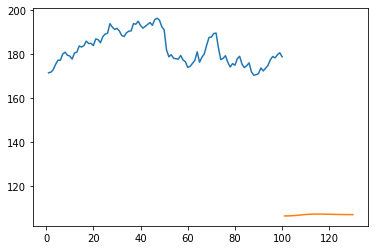

In [89]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

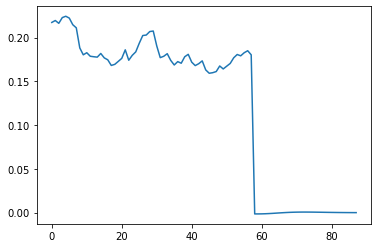

In [90]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [91]:
df3=scaler.inverse_transform(df3).tolist()

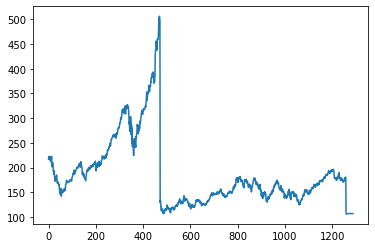

In [92]:
plt.plot(df3)